In [910]:
import pickle
import agent_test
import environment_test
import runner_test
import graph
import logging
import numpy as np
import networkx as nx
import sys
from tools import *

In [911]:
lr = 1e-3
model = 'S2V_QN_1'
bs = 32
n_step = 3
use_cuda = False
environment_name = 'SIR'
verbose = True
node_n = 100
net = 'ba'
seeds = [20,30,0]

In [912]:
def sort_nodenum(G):
    l1 = sorted(list(map(int,G.nodes())))
    l2 = range(G.number_of_nodes())

    nodes = dict(map(lambda x,y:[x,y],l1,l2)) 
    edge_list=[]
    for u,v in G.edges():
        edge_list.append((nodes[int(u)],nodes[int(v)]))
    new_G=nx.Graph()
    new_G.add_edges_from(edge_list)
    return new_G.copy()

In [913]:
with open('graph_dic_'+str(10)+'_'+str(node_n)+'_'+ net,'rb') as f:
    graph_dic_ = pickle.load(f)  

In [914]:
graph_dic_ = {}

In [915]:
G_deezer = get_graph_from_txt( './data/deezer_europe_edges.csv',',')


In [916]:
G_lastfm = get_graph_from_txt('./data/lastfm_asia_edges.csv','\t')

In [917]:
G_ego = nx.ego_graph(G_deezer,4,2)
G_lastfm_ego = G_ego.copy()
G_lastfm_ego.number_of_nodes()

162

In [918]:
graph_dic_[4] = graph.Graph('man', 0, 0, m=None, seed=None, g=sort_nodenum(G_lastfm_ego))

In [919]:
graph_dic_

{4: <graph.Graph at 0x7f39f64182e0>}

In [920]:
graph_dic_[0].nodes()

KeyError: 0

In [25]:
len(graph_dic_[0].edges())

184

In [921]:
graph_dic = graph_dic_

In [690]:
agent_class = agent_test.DQAgent(graph_dic, model, lr,bs,n_step,use_cuda)
agent_class.load_model('./trained_models/model_5000_5_40er.pt')

In [922]:
agent_class = agent_test.DQAgent(graph_dic, model, lr,bs,n_step,use_cuda)
agent_class.load_model('./trained_models/500model_2000_10_40baer.pt')

/home/zhihao/Document/RLGNN/COLGE_/utils/config.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  model_config = yaml.load(config_file)


In [923]:
env_class = environment_test.Environment(graph_dic,environment_name,0.3)

In [924]:
my_runner = runner_test.Runner(env_class, agent_class,50,verbose)

In [925]:
results = my_runner.evaluate(1000)


--------------------------------------------------start evaluation--------------------------------------------------


KeyError: 0

In [694]:
results

({0: [4,
   7,
   8,
   11,
   13,
   15,
   17,
   20,
   21,
   2,
   5,
   6,
   12,
   28,
   29,
   33,
   49,
   52,
   1,
   14,
   24,
   35,
   50,
   10,
   0,
   30,
   43,
   74,
   37,
   9],
  1: [4,
   18,
   19,
   22,
   44,
   0,
   3,
   8,
   9,
   10,
   25,
   2,
   6,
   7,
   12,
   14,
   43,
   46,
   53,
   5,
   13,
   58,
   33,
   39,
   27,
   28,
   62,
   40,
   24,
   15],
  2: [0,
   1,
   4,
   11,
   23,
   29,
   37,
   41,
   5,
   8,
   14,
   16,
   20,
   26,
   10,
   12,
   13,
   15,
   17,
   45,
   7,
   35,
   22,
   9,
   82,
   34,
   3,
   44,
   42,
   6],
  3: [4,
   5,
   6,
   13,
   22,
   2,
   8,
   11,
   14,
   15,
   31,
   39,
   17,
   20,
   25,
   26,
   28,
   34,
   0,
   24,
   33,
   55,
   69,
   1,
   3,
   10,
   23,
   27,
   59,
   38],
  4: [21,
   12,
   15,
   0,
   1,
   3,
   4,
   5,
   7,
   8,
   25,
   6,
   10,
   29,
   30,
   45,
   23,
   41,
   19,
   14,
   38,
   26,
   39,
   75,
   13,
   63,
  

# spreading similuation

In [695]:
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx
from random import choice
from random import sample
#import powerlaw
from random import shuffle
import EoN


In [696]:

def spread_on_Gs(G_list,ini_num,times,N,seeds,tau=1.2,gamma=1):
    com_nodes = (G_list[-1].nodes)
    report_times = np.linspace(0,15,101)

    initial_infecteds = sample(list(com_nodes),ini_num)
   # initial_infecteds = seeds
    #res = []
    for i in range(len(G_list)):
        S,I,R = simulate_spread_times(G_list[i],tau, gamma,times,initial_infecteds,report_times)
        res = ([report_times,S/N,I/N,R/N])
    return np.array(res)
                     

def simulate_spread_times(G,tau, gamma,times,ini_infecteds,report_times):
    
    Ssum = np.zeros(len(report_times))
    Isum = np.zeros(len(report_times))
    Rsum = np.zeros(len(report_times))
    iterations = times
    for counter in range(iterations):
        t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds = ini_infecteds)
        newS, newI, newR = EoN.subsample(report_times, t, S, I, R)    
        Ssum += newS
        Isum += newI
        Rsum += newR
    Save = Ssum / float(iterations)
    Iave = Isum / float(iterations)
    Rave = Rsum / float(iterations)
    return Save,Iave,Rave
        

In [885]:
g_index = 4

In [886]:
G_list = []
g = graph_dic[g_index].g.copy()
for i in results[0][g_index]:
    g.remove_node(i)
    g_ = g.copy()
    G_list.append(g_)

In [887]:
G_list[-1-5].number_of_nodes()

75

In [888]:
# res_list = spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# for i in range(99):
#     res_list += spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# res_list = res_list / 100

In [889]:
#plt.plot(res_list[3][0][:65]*10, res_list[-1][2][:65],'--',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list[3][0][:65]*10, res_list[3][2][:65],'-',label = r'10% immunization with JN',color='red')
#plt.plot(res_list[12][0][:65]*10, res_list[3][2][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
#plt.plot(res_list[0][:65]*10, res_list[2][:65],'-',label = r'20% immunization with JN',color='blue')


In [890]:
#plt.plot(res_list[3][0][:65]*10, res_list[-1][3][:65],'--',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'-',label = r'10% immunization with JN',color='red')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
#plt.plot(res_list[0][:65]*10, res_list[3][:65],'-',label = r'20% immunization with JN',color='blue')


In [891]:
from random import choice
G_list_random = []
g = graph_dic[g_index].g.copy()
for _ in range(len(results[0][g_index])):
    i = choice(list(g.nodes))
    while i in seeds:
        i = choice(list(g.nodes))
    g.remove_node(i)
    g_ = g.copy()
    G_list_random.append(g_)
    

In [892]:
len(G_list_random)

30

In [893]:

# res_list_random = spread_on_Gs([G_list_random[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# for i in range(99):
#     res_list_random += spread_on_Gs([G_list_random[-1]],3,50,node_n,seeds,tau=1.2,gamma=1)
# res_list_random = res_list_random / 100

In [894]:
#plt.plot(res_list_random[3][0][:65]*10, res_list_random[-1][3][:65],'-',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list_random[3][0][:65]*10, res_list_random[6][3][:65],'-',label = r'10% immunization with JN',color='red')
# plt.plot(res_list_random[0][:65]*10, res_list_random[3][:65],'-',label = r'20% immunization with JN',color='blue')


# #plt.plot(res_list[3][0][:65]*10, res_list[-1][3][:65],'-',label = r'10% immunization with FN',color='y')
# #plt.plot(res_list[3][0][:65]*10, res_list[6][3][:65],'-',label = r'10% immunization with JN',color='g')
# #plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
# plt.plot(res_list[0][:65]*10, res_list[3][:65],'-',label = r'20% immunization with JN',color='k')


In [895]:

G_list_greedy_degree = []
g = graph_dic[g_index].g.copy()

#for _ in range(len(results[0][0])):
deg_dict = dict(g.degree())
    #max_key = max(deg_dict, key=lambda key: deg_dict[key])
    #print(max_key)
    #if max_key not in [3]:
        #i = choice(list(g.nodes))
keys = sorted(deg_dict, key=lambda key: deg_dict[key])
       
g.remove_nodes_from(keys[-len(results[0][g_index]):])
g_ = g.copy()
G_list_greedy_degree.append(g_)

In [896]:
G_list_greedy_degree[0].number_of_nodes()

70

In [897]:
G_list_greedy_degree[0].number_of_edges()

55

In [898]:
G_list[-1].number_of_edges()

59

In [899]:
G_list[-1].number_of_nodes()

70

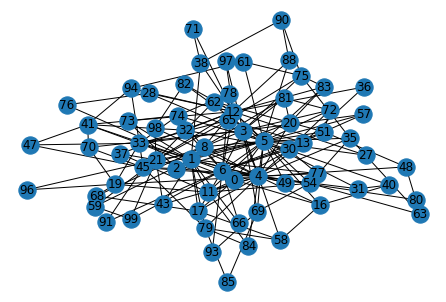

In [900]:
nx.draw(G_list_random[-1],with_labels=g.nodes)

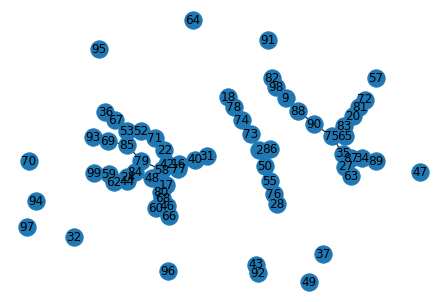

In [901]:
nx.draw(G_list_greedy_degree[0],with_labels=g.nodes)

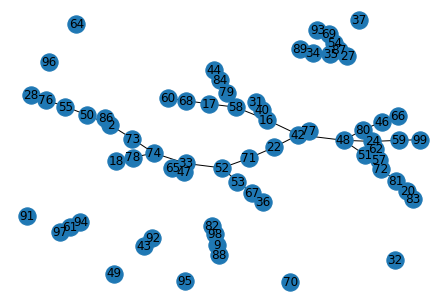

In [902]:
nx.draw(G_list[-1],with_labels=g.nodes)

In [903]:
G_list[-1].nodes

NodeView((2, 9, 16, 17, 18, 20, 22, 24, 27, 28, 31, 32, 33, 34, 35, 36, 37, 40, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [904]:
G_list_greedy_degree[0].nodes

NodeView((2, 9, 16, 17, 18, 20, 22, 24, 27, 28, 31, 32, 34, 35, 36, 37, 40, 42, 43, 44, 46, 47, 48, 49, 50, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

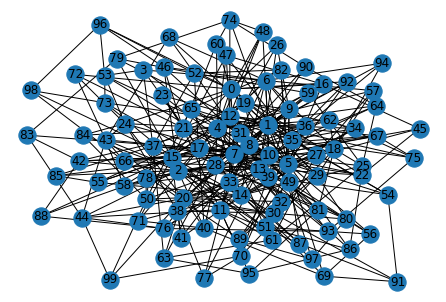

In [905]:
nx.draw(graph_dic[0].g,with_labels=g.nodes)

In [906]:
tau = 1.2
res_list_greedy_degree = spread_on_Gs([G_list_greedy_degree[0]],3,50,node_n,seeds,tau,gamma=1)
for i in range(99):
    res_list_greedy_degree += spread_on_Gs([G_list_greedy_degree[0]],3,50,node_n,seeds,tau,gamma=1)
res_list_greedy_degree = res_list_greedy_degree / 100


res_list = spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau,gamma=1)
for i in range(99):
    res_list += spread_on_Gs([G_list[-1]],3,50,node_n,seeds,tau,gamma=1)
res_list = res_list / 100

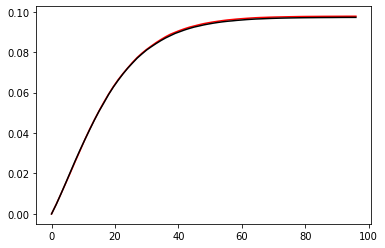

In [907]:
#plt.plot(res_list_greedy_degree[3][0][:65]*10, res_list_greedy_degree[-1][3][:65],'-',label = r'10% immunization with FN',color='salmon')
#plt.plot(res_list_greedy_degree[3][0][:65]*10, res_list_greedy_degree[3][3][:65],'-',label = r'10% immunization with JN',color='red')
plt.plot(res_list_greedy_degree[0][:65]*10, res_list_greedy_degree[3][:65],'-',label = r'20% immunization with JN',color='r')



#plt.plot(res_list_random[0][:65]*10, res_list_random[3][:65],'-',label = r'20% immunization with JN',color='blue')

#plt.plot(res_list[3][0][:65]*10, res_list[-1][3][:65],'-',label = r'10% immunization with FN',color='y')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'-',label = r'10% immunization with JN',color='g')
#plt.plot(res_list[3][0][:65]*10, res_list[3][3][:65],'--',label = r'20% immunization with FN',color='dodgerblue')
plt.plot(res_list[0][:65]*10, res_list[3][:65],'-',label = r'20% immunization with JN',color='k')

